<a href="https://colab.research.google.com/github/yhblank/DeZero/blob/main/step34.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
_colab_dir = "./drive/MyDrive/Colab Notebooks"
os.chdir(_colab_dir)
print("カレントワーキングディレクトリは[" + os.getcwd() + "]です")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
カレントワーキングディレクトリは[/content/drive/MyDrive/Colab Notebooks]です


In [2]:
import numpy as np
from dezero import Variable
import dezero.functions as F

x = Variable(np.array(1.0))
y = F.sin(x)
y.backward(create_graph=True)

for i in range(3):
  gx = x.grad
  x.cleargrad()
  gx.backward(create_graph=True)
  print(x.grad) # n階微分

variable(-0.8414709848078965)
variable(-0.5403023058681398)
variable(0.8414709848078965)


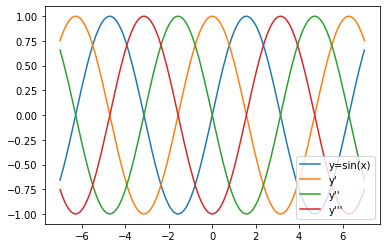

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from dezero import Variable
import dezero.functions as F
x = Variable(np.linspace(-7, 7, 200))
y = F.sin(x)
y.backward(create_graph=True)
logs = [y.data.flatten()]
for i in range(3):
  logs.append(x.grad.data.flatten())
  gx = x.grad
  x.cleargrad()
  gx.backward(create_graph=True)
# グラフの描画
labels = ["y=sin(x)", "y'", "y''", "y'''"]
for i, v in enumerate(logs):
  plt.plot(x.data, logs[i], label=labels[i])
plt.legend(loc='lower right')
plt.show()